# Performing EDA on TMDB Movies DataSet

In [1]:
import pandas as pd

In [16]:
df = pd.read_csv("TMDB Top Movies.csv")

In [146]:
df.columns

Index(['id', 'title', 'overview', 'release_date', 'popularity', 'vote_average',
       'vote_count', 'year', 'year_group'],
      dtype='object')

### Take a sample from Dataset

In [147]:
df.sample(10)

,id,title,overview,release_date,popularity,vote_average,vote_count,year,year_group
7764,8130,Desperately Seeking Susan,A bored New Jersey suburban housewife's fascin...,1985-03-29,3.530,6.053,445,1985.0,1951-2000
7585,8818,Evita,The hit musical based on the life of Evita Dua...,1996-12-14,3.530,6.100,482,1996.0,1951-2000
6392,608,Men in Black II,"Kay and Jay reunite to provide our best, last ...",2002-07-03,4.652,6.400,10032,2002.0,2001-2025
7283,61717,Wendy Wu: Homecoming Warrior,"It is the story of an average, popular America...",2006-06-16,3.531,6.200,421,2006.0,2001-2025
3895,35854,Flash Point,"Detective Sergeant Ma Jun, known for dispensin...",2007-07-26,3.532,6.900,326,2007.0,2001-2025
5350,10484,The ComDads,"Unable to find her runaway son, a woman deceiv...",1983-11-23,3.824,6.600,401,1983.0,1951-2000
6138,42892,Happy Family,"A blocked screenwriter, Ezio, is trying to fin...",2010-03-26,3.532,6.424,304,2010.0,2001-2025
1799,81188,Rise of the Guardians,When an evil spirit known as Pitch lays down t...,2012-11-21,4.291,7.363,6787,2012.0,2001-2025
4808,421447,The Climb,"A true story of Samy, native of La Courneuve, ...",2017-01-25,3.535,6.692,863,2017.0,2001-2025
3988,181886,Enemy,A mild-mannered college professor discovers a ...,2014-03-14,3.877,6.863,5949,2014.0,2001-2025


### Get Info About Coulmns, Datatypes and nullvalues

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            10000 non-null  int64         
 1   title         10000 non-null  object        
 2   overview      10000 non-null  object        
 3   release_date  9998 non-null   datetime64[ns]
 4   popularity    10000 non-null  float64       
 5   vote_average  10000 non-null  float64       
 6   vote_count    10000 non-null  int64         
 7   year          9998 non-null   float64       
 8   year_group    9998 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 635.0+ KB


### Get Summ of Null values in Each Row

In [149]:
df.isnull().sum()

id              0
title           0
overview        0
release_date    2
popularity      0
vote_average    0
vote_count      0
year            2
year_group      2
dtype: int64

### Describe statistics of DataSet

In [150]:
df.describe()

,id,release_date,popularity,vote_average,vote_count,year
count,1.000000e+04,9998,10000.000000,10000.000000,10000.000000,9998.000000
mean,2.046952e+05,2004-12-25 09:13:04.236847360,3.694318,6.638589,1994.946500,2004.443489
min,2.000000e+00,1902-06-15 00:00:00,0.004000,4.169000,300.000000,1902.000000
25%,1.020550e+04,1998-01-16 00:00:00,3.533000,6.100000,466.000000,1998.000000
50%,3.853450e+04,2009-12-23 00:00:00,3.568000,6.667000,842.000000,2009.000000
75%,3.736912e+05,2017-04-10 18:00:00,3.797000,7.200000,1971.500000,2017.000000
max,1.356039e+06,2025-03-07 00:00:00,26.297000,8.708000,37193.000000,2025.000000
std,2.710932e+05,NaN,0.596658,0.761696,3173.534868,17.326893


### Find the duplicacy in DataSet

In [151]:
df.duplicated().sum()

np.int64(200)

### Correlations BTW Columns 

In [152]:
df.dtypes

id                       int64
title                   object
overview                object
release_date    datetime64[ns]
popularity             float64
vote_average           float64
vote_count               int64
year                   float64
year_group            category
dtype: object

In [153]:
df.corr(numeric_only=True)

,id,popularity,vote_average,vote_count,year
id,1.000000,0.109754,0.023998,-0.090107,0.608192
popularity,0.109754,1.000000,0.124309,0.281064,0.074775
vote_average,0.023998,0.124309,1.000000,0.278436,-0.225441
vote_count,-0.090107,0.281064,0.278436,1.000000,0.068822
year,0.608192,0.074775,-0.225441,0.068822,1.000000


In [154]:
df.corr(numeric_only=True)['popularity']

id              0.109754
popularity      1.000000
vote_average    0.124309
vote_count      0.281064
year            0.074775
Name: popularity, dtype: float64

## Categorical Data

### 1. Count Plot

In [71]:
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df['release_date']=pd.to_datetime(df['release_date'])

### Count of Movies Released in Different Time Periods

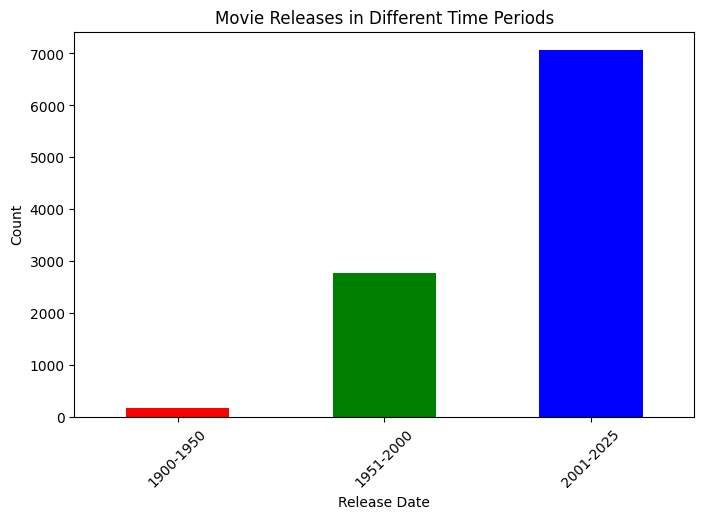

Execution Time: 0.89825 seconds


In [155]:
start_time = time.time()
sum([i for i in range(1000000)])

bins=[1900,1950,2000,2025]
labels=["1900-1950","1951-2000","2001-2025"]

year_count=pd.cut(df['release_date'].dt.year,bins=bins, labels=labels,right=True).value_counts().sort_index()
year_count.plot(kind='bar', color=['red','green','blue'],figsize=(8,5))


plt.xlabel("Release Date")
plt.ylabel("Count")
plt.title("Movie Releases in Different Time Periods")
plt.xticks(rotation=45)  
plt.show()

end_time = time.time()
execution_time = end_time - start_time 
print(f"Execution Time: {execution_time:.5f} seconds")

### 2. Pie Chart

<Axes: ylabel='count'>

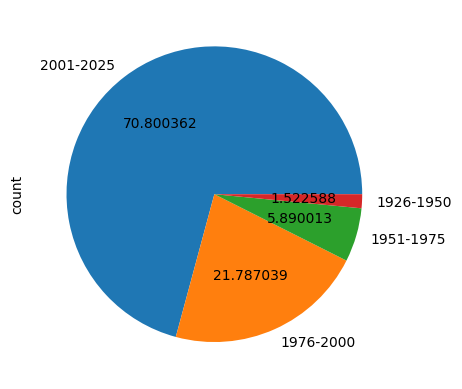

In [165]:
bins=[1925,1950,1975,2000,2025]
labels=["1926-1950", "1951-1975","1976-2000", "2001-2025"]
pie_chart=pd.cut(df['release_date'].dt.year,bins=bins, labels=labels,right=True)
pie_chart.value_counts().plot(kind='pie', autopct='%f')

## Numerical Data

### 1. Histogram

(array([  84.,  158.,  546., 1084., 2086., 2086., 2100., 1314.,  455.,
          87.]),
 array([4.169 , 4.6229, 5.0768, 5.5307, 5.9846, 6.4385, 6.8924, 7.3463,
        7.8002, 8.2541, 8.708 ]),
 <BarContainer object of 10 artists>)

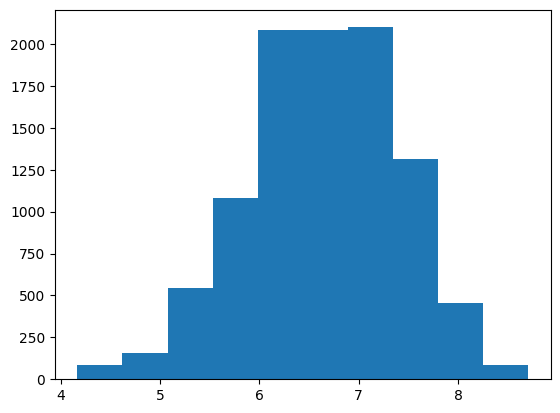

In [176]:
plt.hist(df['vote_average'])

### 2. Probability Distribution Function(PDF)

<Axes: xlabel='vote_average', ylabel='Density'>

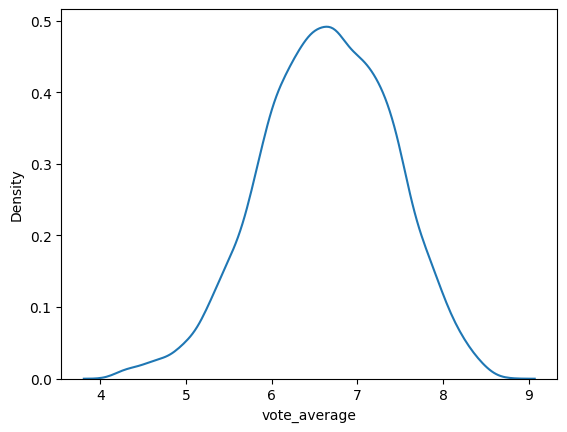

In [230]:
sns.kdeplot(df['vote_average'])

### 3. Boxplot

<Axes: ylabel='vote_average'>

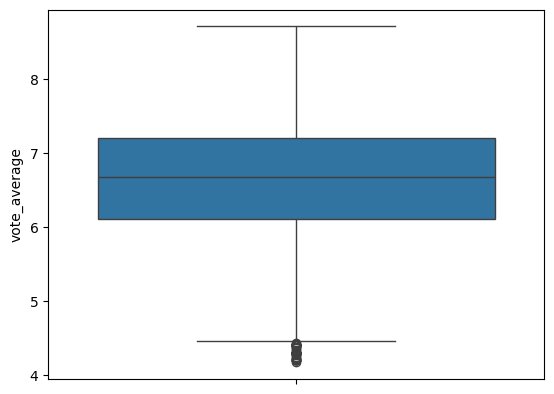

In [186]:
sns.boxplot(df['vote_average'])

### Lowest Vote Average

In [190]:
df['vote_average'].min()

np.float64(4.169)

### Highest Vote Average

In [191]:
df['vote_average'].max()

np.float64(8.708)

### Lowest Vote Count

In [192]:
df['vote_count'].min()

np.int64(300)

### Highet Vote Count

In [198]:
df['vote_count'].max()

np.int64(37193)

### Movie with Highest Vote Count

In [197]:
hcount=df['vote_count'].max()
df[df['vote_count']==hcount][['title','vote_count']]

,title,vote_count
46,Inception,37193


### Movies with Highest Vote Count

In [199]:
hcount=df['vote_count'].max()
df[df['vote_count']==hcount]

,id,title,overview,release_date,popularity,vote_average,vote_count,year,year_group
46,27205,Inception,"Cobb, a skilled thief who commits corporate es...",2010-07-15,6.057,8.369,37193,2010.0,2001-2025


### Movies with Lowest Vote Count and Popularity

In [206]:
lcount=df['vote_count'].min()
df[df['vote_count']==lcount].sort_values(by='popularity').head(1)

,id,title,overview,release_date,popularity,vote_average,vote_count,year,year_group
2561,4043,Law of Desire,"Pablo, a successful film director, disappointe...",1987-02-07,3.53,7.2,300,1987.0,1951-2000


## Bivirate/Multivariate Analysis

### 1. Scatter Plot (Numerical - Numerical)

<Axes: xlabel='popularity', ylabel='year'>

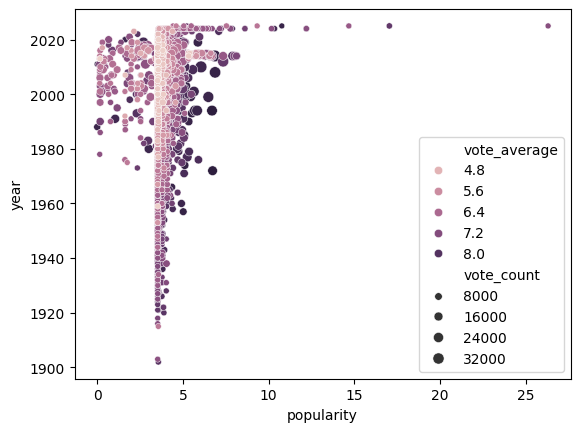

In [218]:
sns.scatterplot(x=df['popularity'],y=df['year'], hue=df['vote_average'],size=df['vote_count'])

### 2. Top 10 Most Popular Movies (Categorical - Numerical)

<Axes: xlabel='title', ylabel='popularity'>

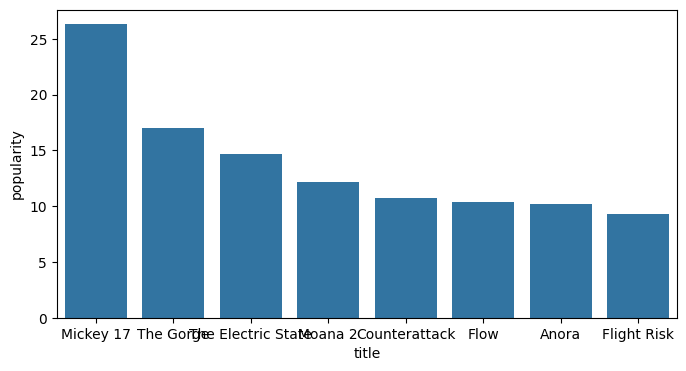

In [225]:
data=df.sort_values(by='popularity', ascending=False).head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x='title', y='popularity',data=data)

### Top 10 Highest Rated Movies of 2025 (Categorical - Numerical)

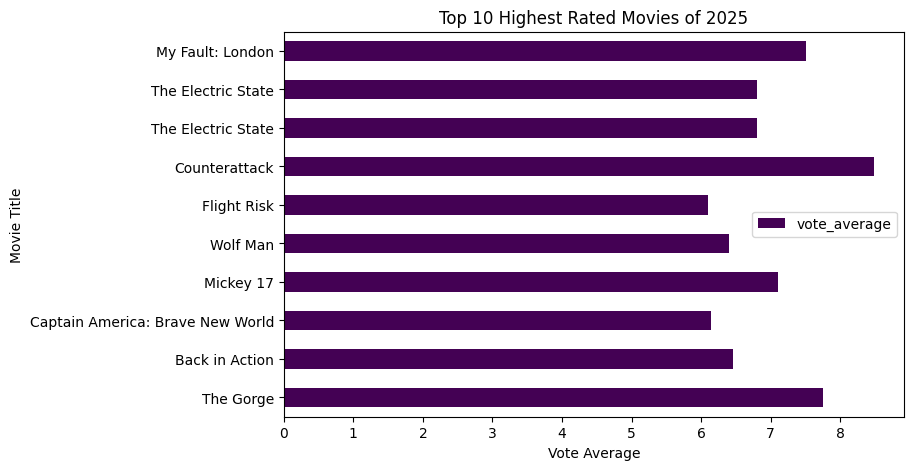

In [220]:
df_filter=df[df['release_date'].dt.year==2025]
df_filter.nlargest(10, 'vote_count')\
    .sort_values(by='vote_count', ascending=False)\
    .plot(kind='barh',x='title',y='vote_average', figsize=(8,5), colormap='viridis')
plt.xlabel("Vote Average")
plt.ylabel("Movie Title")
plt.title("Top 10 Highest Rated Movies of 2025")
plt.show()

### Top 10 Highest Rated Movies of 2025 (Categorical - Numerical)

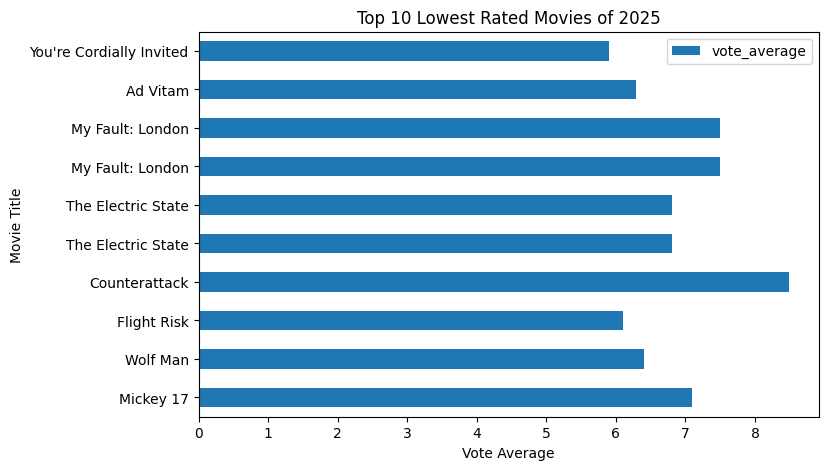

In [221]:
df_filter=df[df['release_date'].dt.year==2025]
df_filter.nsmallest(10, 'vote_count')\
    .sort_values(by='vote_count', ascending=False)\
    .plot(kind='barh',x='title',y='vote_average', figsize=(8,5))
plt.xlabel("Vote Average")
plt.ylabel("Movie Title")
plt.title("Top 10 Lowest Rated Movies of 2025")
plt.show()

### Twin Axes (Categorical - Numerical)

C:\Users\fahad\AppData\Local\Temp\ipykernel_14460\1776723014.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='popularity', data=data, ax=ax1, palette='viridis')


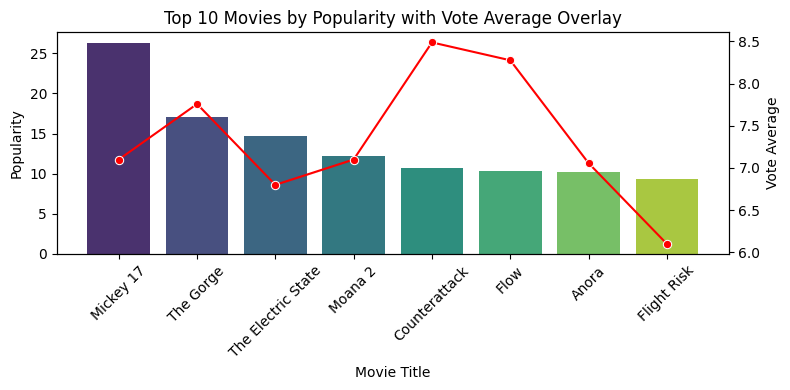

In [227]:
data = df.sort_values(by='popularity', ascending=False).head(10)
fig, ax1 = plt.subplots(figsize=(8, 4))

sns.barplot(x='title', y='popularity', data=data, ax=ax1, palette='viridis')
ax1.set_ylabel("Popularity")
ax1.set_xlabel("Movie Title")
ax1.tick_params(axis='x', rotation=45)
ax1.set_title("Top 10 Movies by Popularity with Vote Average Overlay")

ax2 = ax1.twinx()
sns.lineplot(x='title', y='vote_average', data=data, ax=ax2, color='red', marker='o', sort=False)
ax2.set_ylabel("Vote Average")

plt.tight_layout()
plt.show()


### 3. PDF Distribution (Categorical - Numerical)

<Axes: xlabel='vote_average', ylabel='Density'>

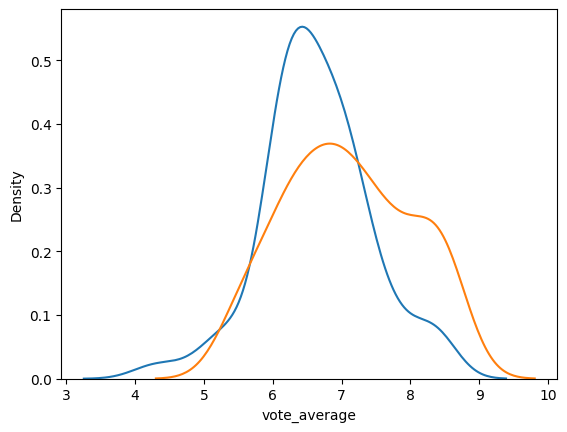

In [233]:
data=df.sort_values(by='popularity')['vote_average'].head(100)
sns.kdeplot(data)
data=df.sort_values(by='popularity',ascending=False)['vote_average'].head(100)
sns.kdeplot(data)

### Correlation Btw Popularity, Vote count and Vote Average (Categorical - Categorical)

<Axes: >

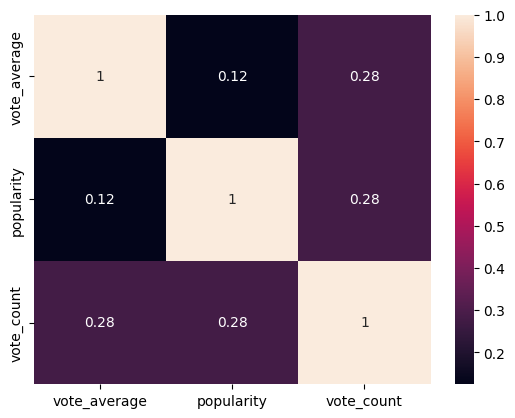

In [234]:
sns.heatmap(df[['vote_average', 'popularity', 'vote_count']].corr(),annot=True)

### Pair Plot

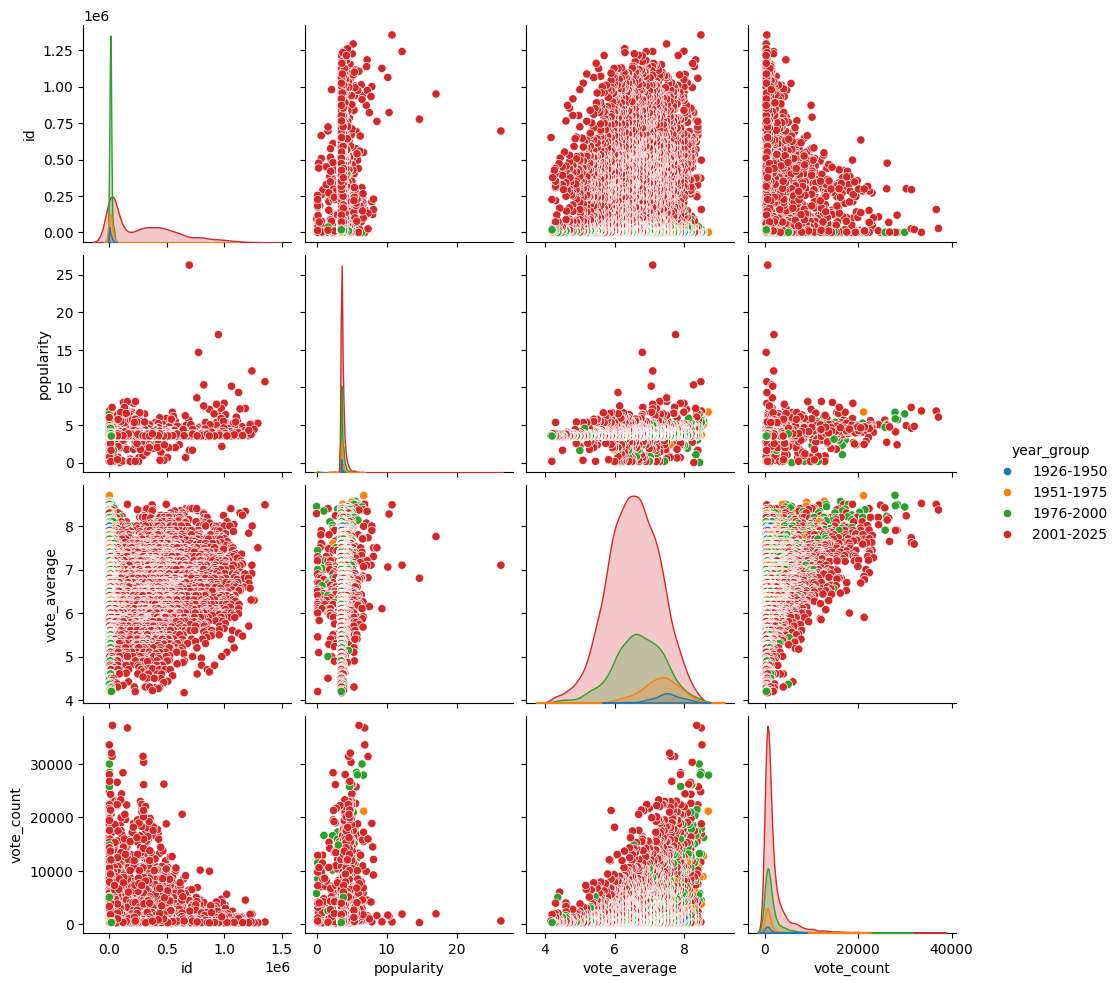

In [254]:
bins = [1925, 1950, 1975, 2000, 2025]
labels = ["1926-1950", "1951-1975", "1976-2000", "2001-2025"]
df['year_group'] = pd.cut(df['release_date'].dt.year, bins=bins, labels=labels, right=True)
sns.pairplot(df,hue='year_group')

In [265]:
df['release_date'].dt.year.value_counts().sort_index()


release_date
1902.0      1
1903.0      1
1915.0      1
1916.0      1
1918.0      1
         ... 
2021.0    330
2022.0    301
2023.0    237
2024.0    178
2025.0     13
Name: count, Length: 111, dtype: int64